In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp

In [28]:
prob2 = pd.read_csv("data/ad.csv", comment="#")
prob2

,office,sales,ad_cost,salespeople
0,A,8,500,6
1,B,9,500,8
2,C,13,700,10
3,D,11,500,11
4,E,14,800,12
5,F,17,1200,13
6,G,15,900,11
7,H,12,700,9


In [38]:
X = prob2[["ad_cost", "salespeople"]]
y = prob2["sales"]

model = sm.OLS(y, sm.add_constant(X))

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.92
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           0.000246
Time:                        17:39:47   Log-Likelihood:                -6.3660
No. Observations:                   8   AIC:                             18.73
Df Residuals:                       5   BIC:                             18.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0350      1.163      0.890      

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [7]:
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec_x = np.array(vec_x, dtype='float64')
    vec = np.asmatrix((vec_x - vec_mean).values.reshape(length, 1))
    inv = np.linalg.inv(mat) # 逆行列を求める　Compute the inverse of a matrix.
    mahala2 = vec.T.dot(inv.dot(vec)) 
    return mahala2[0, 0]

In [10]:
Sigma = np.asmatrix(prob2[["ad_cost", "salespeople"]].cov()) # 独立変数の分散共分散行列を求める． Variance-covariance matrix of IVs.
n = len(prob2) # 標本数. Sample size.
dfm = results.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = prob2[["ad_cost", "salespeople"]].mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

#観測値に対応する従属変数の信頼区間を求める Find CI of Y on observed values
X = np.array([1, 500, 8]) #観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([500, 8], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = results.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

#予測値（未観測値に対応する従属変数）の信頼区間を求める Find prediction interval of Y on unobserved values
X = np.array([1, 500, 8]) #未観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([500, 8], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

ad_cost        725.0
salespeople     10.0
dtype: float64
理論値（theoretical value）: 9.50669984686066
理論値の信頼区間（CI of theoretical value）：(8.620015647969181,10.393384045752137)
予測値（Predicted value）: 9.50669984686066
予測値の信頼区間（CI of predicted value）：(7.550608313608761,11.462791380112558)


In [12]:
Sigma = np.asmatrix(prob2[["ad_cost", "salespeople"]].cov()) # 独立変数の分散共分散行列を求める． Variance-covariance matrix of IVs.
n = len(prob2) # 標本数. Sample size.
dfm = results.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = prob2[["ad_cost", "salespeople"]].mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

#観測値に対応する従属変数の信頼区間を求める Find CI of Y on observed values
X = np.array([1, 600, 9]) #観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([600, 9], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = results.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

#予測値（未観測値に対応する従属変数）の信頼区間を求める Find prediction interval of Y on unobserved values
X = np.array([1, 600, 9]) #未観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([600, 9], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

ad_cost        725.0
salespeople     10.0
dtype: float64
理論値（theoretical value）: 10.847052067381327
理論値の信頼区間（CI of theoretical value）：(10.141670101559308,11.552434033203346)
予測値（Predicted value）: 10.847052067381327
予測値の信頼区間（CI of predicted value）：(8.96618818724463,12.727915947518024)


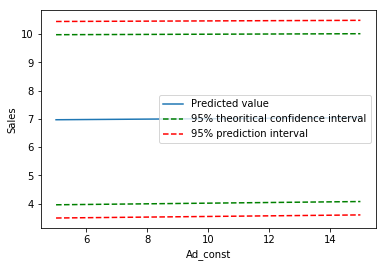

In [40]:
ad_const = np.linspace(5, 15, 100) # 5から15までの等差数列を生成

hat_y = []
(salespeople) = (10) # Wind, Tempの値を(10, 78)に固定.　Wind, Temp values are fixed to (10, 78).

for s in ad_const:
    X = np.array([1, s, salespeople])
    hat_y.append(X.dot(results.params))# Xとresults.paramsの内積を求め従属変数の推定値を求める Obtain estimated value of dependent variable
plt.plot(ad_const, hat_y, label="Predicted value") # 予測値をプロット

D2 = []
for s in ad_const:
    D2_0 = Mahala2([s, salespeople], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
    D2.append(D2_0)
D2 = np.array(D2)

Se_o = np.sqrt((1/n + D2 / (n-1)) * Ve) #観測値の場合　In case of observation value
Se_p = np.sqrt((1 + 1/n + D2 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

# 観測値に対応する従属変数の信頼区間をプロット
plt.plot(ad_const, hat_y - t_0025 * Se_o, "--g", label="95% theoritical confidence interval")
plt.plot(ad_const, hat_y + t_0025 * Se_o, "--g")

# 予測値の信頼区間をプロット
plt.plot(ad_const, hat_y - t_0025 * Se_p, "--r", label="95% prediction interval")
plt.plot(ad_const, hat_y + t_0025 * Se_p, "--r")

plt.xlabel("Ad_const")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [39]:
X_scale = sp.scale(X)
y_scale = sp.scale(y)

# モデルの設定
mod = sm.OLS(y_scale, sm.add_constant(X_scale))

# 回帰分析の実行
res = mod.fit()

# 結果を表示
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     66.92
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           0.000246
Time:                        17:39:54   Log-Likelihood:                 1.9440
No. Observations:                   8   AIC:                             2.112
Df Residuals:                       5   BIC:                             2.350
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-17      0.085  -3.27e-16      1.0

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


,ad_cost,salespeople
0,500,6
1,500,8
2,700,10
3,500,11
4,800,12
5,1200,13
6,900,11
7,700,9
